In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import HTML

from prob import data as _data
from prob import keys, in_memory_rfc

In [5]:
train, test = train_test_split(_data, test_size=.2)

rfc = in_memory_rfc(train)

data = test

0.1647940074906367
0.47902791311180953


Text(0, 0.5, 'Quantity')

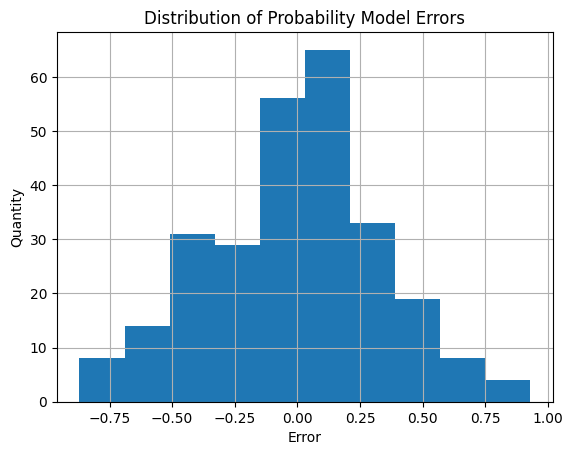

In [11]:
y_pred = rfc.predict(data[keys])
o_proba = rfc.predict_proba(data[keys])[:, 1]
y_true = data["favwin01"]
print(np.mean(np.square(y_true - y_pred)))
print(np.sum(np.square(y_true - o_proba))/np.sum(np.square(y_true - y_true.mean())))
(y_true - o_proba).hist()
plt.title("Distribution of Probability Model Errors")
plt.xlabel("Error")
plt.ylabel("Quantity")

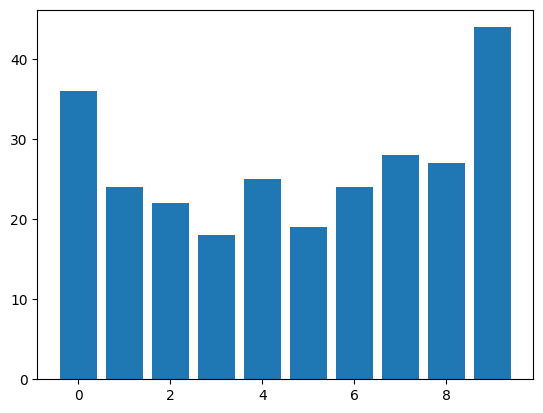

In [7]:
b = [(i + 1) * .1 for i in range(10)]
b[-1] += .01
b[0] -= .01
bins = np.digitize(o_proba, b)
counts = [np.sum(bins == i) for i in range(10)]
plt.bar(range(10), counts)
plt.show()

<Axes: >

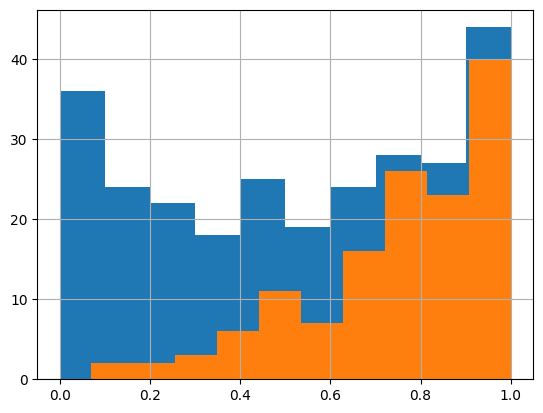

In [8]:
pd.Series(o_proba).hist()
pd.Series(o_proba[data["favwin01"] == 1]).hist()

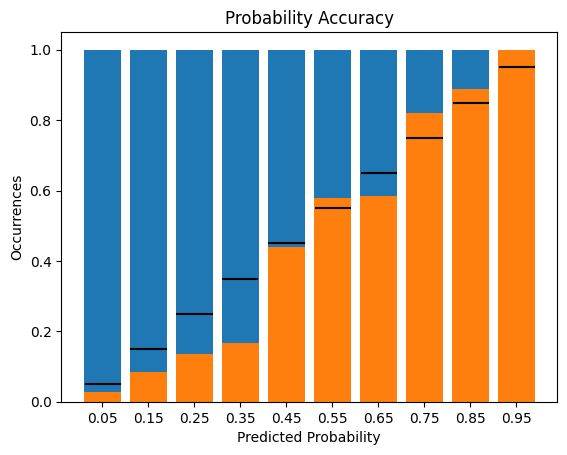

In [ ]:
b = [(i + 1) * .1 for i in range(10)]
b[-1] += .01
b[0] -= .01
bins = np.digitize(o_proba, b)
counts = [np.mean(data["favwin01"][bins == i] == 1) for i in range(10)]
plt.bar(range(10), 1)
plt.bar(range(10), counts)
plt.xticks(range(10), labels=["{:.2f}".format((i + 1) * .1 - .05) for i in range(10)])
plt.title("Probability Accuracy")
plt.xlabel("Predicted Probability")
plt.ylabel("Occurrences")
plt.axhline(.05, xmin=.05, xmax=.1175, c="black")
plt.axhline(.15, xmin=.14, xmax=.212, c="black")
plt.axhline(.25, xmin=.234, xmax=.303, c="black")
plt.axhline(.35, xmin=.327, xmax=.395, c="black")
plt.axhline(.45, xmin=.419, xmax=.49, c="black")
plt.axhline(.55, xmin=.514, xmax=.582, c="black")
plt.axhline(.65, xmin=.606, xmax=.674, c="black")
plt.axhline(.75, xmin=.698, xmax=.768, c="black")
plt.axhline(.85, xmin=.792, xmax=.861, c="black")
plt.axhline(.95, xmin=.885, xmax=.954, c="black")

In [96]:
desc = _data[keys + ["favwin01"]].rename({"favwin01": "winner"}, axis=1).describe().loc[["mean", "std", "min", "50%", "max"]].T
HTML(desc.style.format(precision=1).format_index(str.title, axis=1).format_index(lambda x: x.replace("_", " ").replace("0", " (team 0)").replace("1", " (team 1)").title()).to_html())

,Mean,Std,Min,50%,Max
Away Losses (Team 0),4.8,2.4,0.0,5.0,17.0
Conference Losses (Team 0),4.9,2.4,0.0,5.0,13.0
Conference Wins (Team 0),12.6,2.4,5.0,13.0,19.0
Games Played (Team 0),35.8,2.1,30.0,36.0,41.0
Home Wins (Team 0),14.2,2.2,5.0,15.0,20.0
Losses (Team 0),9.2,3.3,1.0,9.0,21.0
Pace (Team 0),67.2,3.2,57.3,67.1,77.3
Simple Rating System (Team 0),14.3,7.8,-13.4,15.5,28.7
Turnover Percentage (Team 0),15.1,1.6,10.6,15.0,20.7
Wins (Team 0),26.7,4.5,14.0,26.0,38.0
